# 다중 회귀
- 다중의 독립 변수가 존재하는 회귀 분석
- 여러 개의 독립 변수가 복합적으로 종속 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 예측
- 다중 회귀에서 최적의 모델을 결정하기 위해 여러 가지의 방법이 존재
- 모델이 복잡해지면 과대적합이 발생할 가능성이 있기 때문에 이를 방지하기 위해 다양한 규제 방식이 존재하고 규제에 따른 모델이 존재
    - 모델에서 규제 방식에 따라서 가중치를 제한
    - 독립 변수에서의 가중치가 0이 되는 차원(컬럼 | 피쳐)들이 생성
    - 규제를 강하게 걸면 가중치의 절대치가 줄어들고 0에 가까워진다.

## 릿지
- 최소제곱 적합식 수축 패널티라 불리는 항에 L2 패널티를 추가할 것

- 매개변수
    - alpha
        - 기본값 : 1.0
        - 규제의 강도 -> 클수록 회귀 계쑤가 작아지고 과적합의 방지, 과소적합 위험
        - 해당 모델의 중요한 매개변수
    - solver
        - 기본값 : 'auto'
        - 해를 구하는 방법
        - 데이터의 크기 / 희소성에 따라 적합한 solver를 선택
        - 'auto', 'svd' , 'cholesky', 'lsqr', 'sparse_cg;, 'sag', 'saga'
            - svd : 특이갑 분해, 다중공산성 있고 데이터의 개수가 작거나 중간 정도
            - cholesky : 정규방정식, 데이터의 개수가 작거나 중간 정도
            - lsqr : 반복 최소제곱, 대규모 데이터 중 희소/밀집 데이터
            - sparse_cg : 공액 기울기법, 대규모 데이터 중 희소 데이터
            - sag : 확률적 평균 검사, 데이터의 행의 수가 열의 수보다 월등히 많은 경우
            - saga : sag 확장, 대규모 희소, ElasticNet 가능
    - tol
        - 기본값 : 0.001 (1e-03)
        - 수렴의 판단 기준, 작을수록 정밀, 속도적인 면에서 느려질 수 있다.
    - max_iter
        - 기본값 : None
        - 최적화가 될 때까지 최대 반복 횟수.(데이터가 크거나 수치가 불안정할 경우에 필요)


- 속성
    - coef_
        - 회귀 계수를 출력(규제로 인해서 선형 회귀에 비해 값들이 작게 출력)
    - n_iter_
        - solver가 반복한 횟수 출력

In [285]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


In [286]:
diabetes = load_diabetes()

In [287]:
df = pd.DataFrame(diabetes['data'], columns= diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [288]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [289]:
# alpha 값에 따라 회귀계수가 어떻게 변화하는가?
# 반복 실행할 때 마다 회귀계수를 추가해주는 빈 리스트
data = []

for a in alpha:
    # print(a)
    # Ridge class 생성 시 alpha 매개변수에 a를 대입
    ridge = Ridge(alpha = a)
    # 모델 학습
    ridge.fit(df.values, diabetes['target'])
    # 학습된 모델에서 회귀계수를 출력하여 data에 추가
    data.append(
        ridge.coef_
    )
    


In [290]:
df_ridge = pd.DataFrame(data, index=alpha, columns=df.columns)

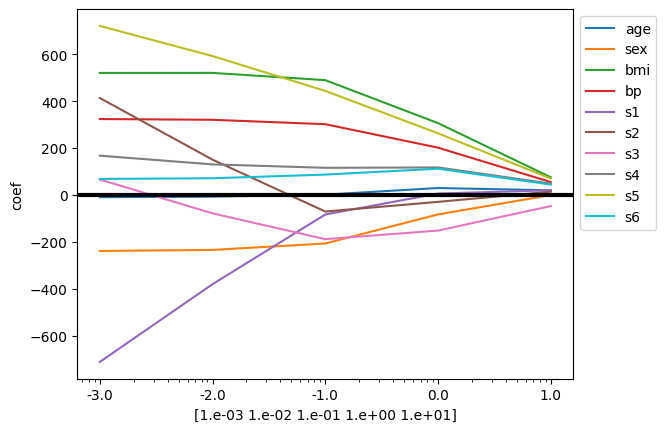

In [291]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.xlabel(alpha)
plt.ylabel('coef')
plt.axhline(y=0, color='black', linewidth=3)

plt.show()

In [292]:
# 단순 선형 회귀와 릿지 회귀의 회귀 계수를 확인
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(
    df.values,
    diabetes['target']
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


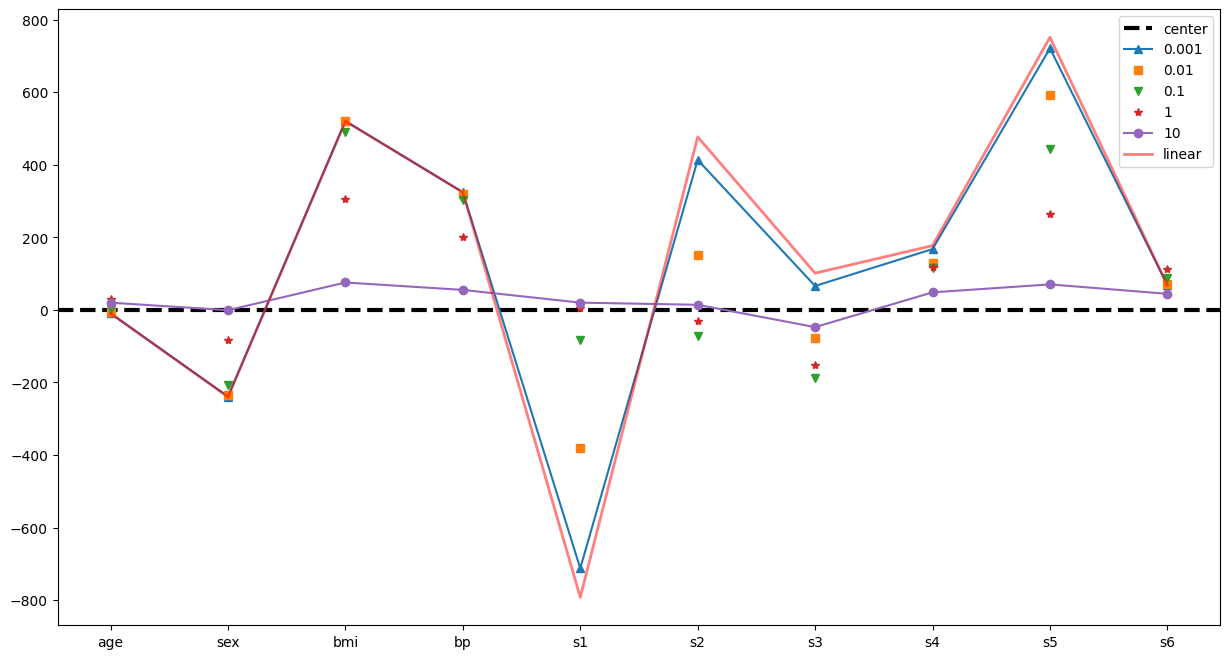

In [293]:
plt.figure(figsize=(15, 8))
plt.axhline(y=0, linestyle = '--', linewidth = 3, color= 'black')
plt.plot(df_ridge.loc[0.001,], '^-')
plt.plot(df_ridge.loc[0.01,], 's')
plt.plot(df_ridge.loc[0.1,], 'v')
plt.plot(df_ridge.loc[1.0,], '*')
plt.plot(df_ridge.loc[10.0,], 'o-')
plt.plot(lr.coef_, 'r-', linewidth=2, alpha=0.5)

plt.legend( ['center', 0.001, 0.01, 0.1, 1, 10, 'linear'], bbox_to_anchor=(1, 1))

plt.show()

- 연습
    - train과 test의 비율은 8:2로 분할
    - 당뇨 데이터를 이용하여 단순 선형 회귀를 이용하여 학습, 평가를 하여 평가지표 mse값을 확인하고
    - 릿지 회귀를 이용하여 alpha가 0.01, 0.1, 1 인 경우로 학습, 평가을 하여 평가 지표 mse값을 확인하여 비교

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [295]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.values,
    diabetes['target'],
    test_size=0.2,
    random_state=42
)

In [296]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [297]:
pred = lr.predict(X_test)

In [298]:
ridge1 = Ridge(alpha = 0.01)
ridge2 = Ridge(alpha = 0.1)
ridge3 = Ridge(alpha = 1)

In [299]:
ridge1.fit(X_train, Y_train)
ridge2.fit(X_train, Y_train)
ridge3.fit(X_train, Y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [300]:
pred1 = ridge1.predict(X_test)
pred2 = ridge2.predict(X_test)
pred3 = ridge3.predict(X_test)

In [301]:
mse = mean_squared_error(Y_test, pred)
mse1 = mean_squared_error(Y_test, pred1)
mse2 = mean_squared_error(Y_test, pred2)
mse3 = mean_squared_error(Y_test, pred3)
print("LR MSE : ", round(mse, 2))
print("Ridge_0.01 MSE : ", round(mse1, 2))
print("Ridge_0.1 MSE : ", round(mse2, 2))
print("Ridge_1 MSE : ", round(mse3, 2))

LR MSE :  2900.19
Ridge_0.01 MSE :  2882.29
Ridge_0.1 MSE :  2856.49
Ridge_1 MSE :  3077.42


In [302]:
from sklearn.metrics import r2_score

In [303]:
r2_lr = r2_score(Y_test, pred)
r2_r1 = r2_score(Y_test, pred1)
r2_r2 = r2_score(Y_test, pred2)
r2_r3 = r2_score(Y_test, pred3)
print("LR r2 : ", round(r2_lr, 4))
print("Ridge_0.01 r2 : ", round(r2_r1, 4))
print("Ridge_0.1 r2 : ", round(r2_r2, 4))
print("Ridge_1 r2 : ", round(r2_r3, 4))


LR r2 :  0.4526
Ridge_0.01 r2 :  0.456
Ridge_0.1 r2 :  0.4609
Ridge_1 r2 :  0.4192


In [304]:
# x_test의 첫번째 인덱스의 값
X_test[0]
# 선형 회귀 계수
lr.coef_
# 절편
lr.intercept_

np.float64(151.34560453985995)

In [305]:
pred[0]


np.float64(139.5475584037961)

In [306]:
pred_1 = lr.intercept_
for w, x in zip(lr.coef_, X_test[0]):
    # pred_1에 w와 x를 곱한 값을 누적합
    pred_1 += (w*x)
    
pred_1 

np.float64(139.5475584037961)

## 라쏘
- 최소 제곱 적합식의 수축 패널티라 불리는 항에 L1 패널티를 추가한 것
- 릿지 회귀가 변수의 크기가 매우 큰 데이터인 경우에는 결과를 해석하는데 어려움 발생하는데 이러한 문제를 해결하기위한 방법

- 매개변수
    - alpha
        - 기본값 : 1.0
        - 규제 강도. 클수록 많은 회귀 계수가 0이 되어 변수 선택(feature_select)
        - 규제의 강도가 너무 큰 ㄴ경우에는 많은 컬럼의 회귀 계수가 0이 되어 단순한 데이터(과소적합)
    - selection
        - 기본값 : 'cyclic'
            - 좌표축 경사법 업데이트의 순서
                - cyclic : 순차적으로 업데이트
                - random : 무작위 선택 업데이트
            - 피쳐의 순서대로 가중치를 적용할 것인가? 아니면 무작위 선택으로 가중치를 적용할 것인가?
    - percompute
        - 기본값 : auto
        - Gram matrix의 미리 계산의 여부
        - 그람 행렬은 선형 대수에서 자주 쓰이는 개념
        - 회귀 분석에서 핵심적인 부분
    - warm_start
        - 기본값 : False
        - 이전의 학습 결과를 이어서 학습을 할지 결정

In [307]:
from sklearn.linear_model import Lasso

In [308]:
# alpha의 범위를 하나 지정
alpha = np.logspace(-3, 1, 5)

# 모델이 학습을 하고 생성된 회귀계수를 추가하는 공간인 빈 리스트를 생성
data = []

for a in alpha:
    lasso = Lasso(alpha=a)
    # 모델 학습
    lasso.fit(
        df.values,
        diabetes['target']
    )
    data.append(lasso.coef_)
    
lasso_df = pd.DataFrame(data, index=alpha, columns=df.columns)
lasso_df    

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


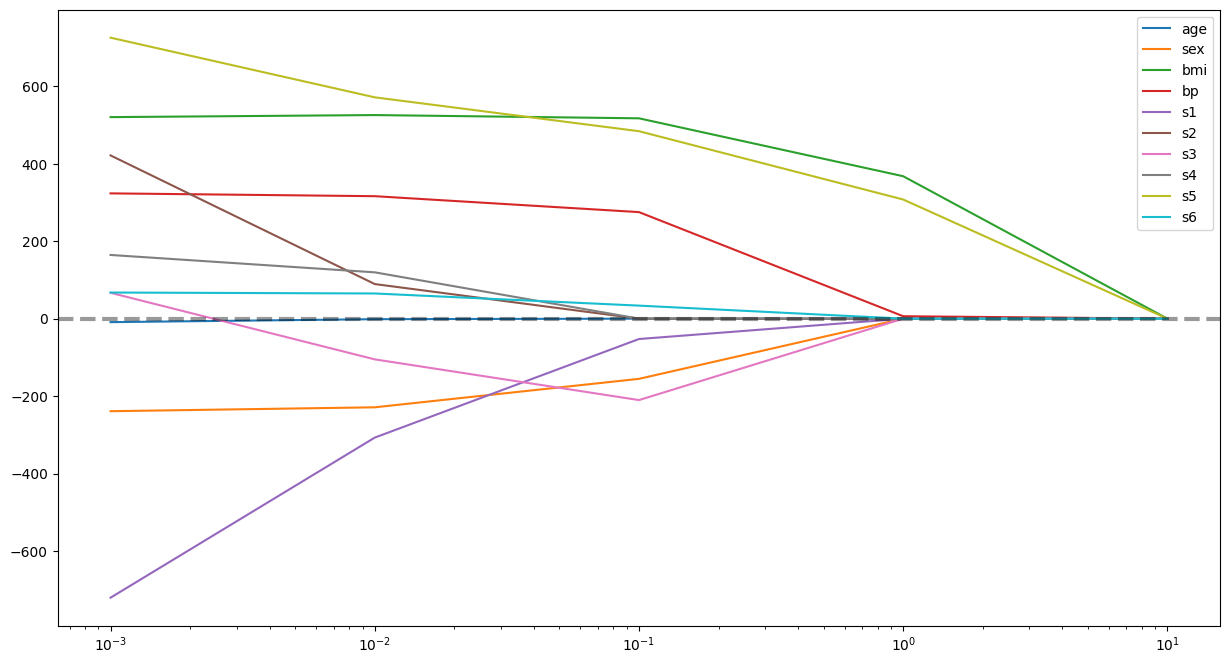

In [309]:
# 회귀 계수를 그래프 시각화
plt.figure(figsize=(15, 8))
plt.semilogx(lasso_df)
# y = 0 보조선 추가
plt.axhline(y=0, linestyle='--', color= 'black', linewidth= 3, alpha = 0.4)
plt.legend(labels = lasso_df.columns, bbox_to_anchor=(1, 1))



plt.show()

In [310]:
lr = LinearRegression()
lr.fit(df.values, diabetes['target'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


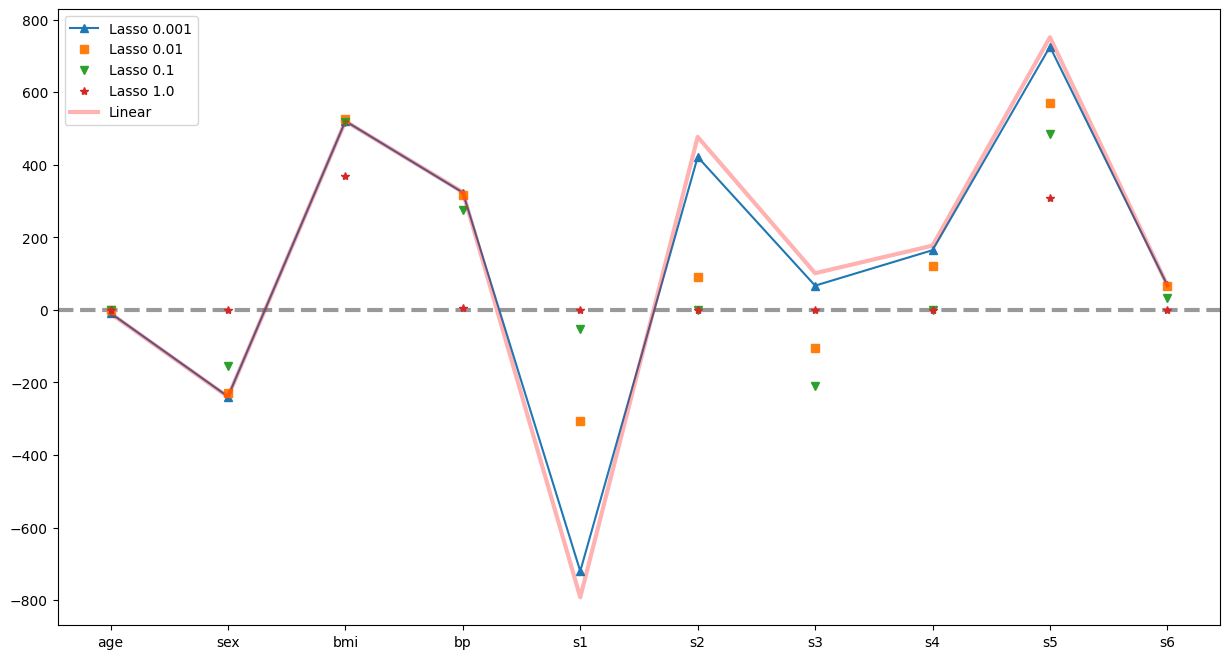

In [311]:
plt.figure(figsize=(15, 8))

plt.axhline(y=0, linestyle='--', color= 'black', linewidth= 3, alpha = 0.4)
plt.plot(lasso_df.loc[0.001, ], '^-', label='Lasso 0.001')
plt.plot(lasso_df.loc[0.01, ], 's', label='Lasso 0.01')
plt.plot(lasso_df.loc[0.1, ], 'v', label='Lasso 0.1')
plt.plot(lasso_df.loc[1.0, ], '*', label='Lasso 1.0')
plt.plot(lr.coef_, 'r', linewidth=3, alpha = 0.3, label='Linear')

plt.legend()

plt.show()

- 연습
    - 단순선형회귀, lasso 모델을 이용하여 당뇨병 데이터 학습을 시키고 평가를 하여 평가 지표를 하나 생성
        - lasso alpha는 0.01, 0.1 2개의 모델을 생성
        - mse, r2_score의 값들을 비교

In [312]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.values,
    diabetes['target'],
    test_size=0.25,
    random_state=42
)

In [313]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [314]:
pred = lr.predict(X_test)

In [326]:
lasso1 = Lasso(alpha=0.01)
lasso2 = Lasso(alpha=0.1)
lasso3 = Lasso(alpha=1)
lasso4 = Lasso(alpha=0.105)

In [327]:
lasso1.fit(X_train, Y_train)
lasso2.fit(X_train, Y_train)
lasso3.fit(X_train, Y_train)
lasso4.fit(X_train, Y_train)

,alpha,0.105
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [328]:
pred4 = lasso1.predict(X_test)
pred5 = lasso2.predict(X_test)
pred6 = lasso3.predict(X_test)
pred7 = lasso4.predict(X_test)

In [329]:
mse = mean_squared_error(Y_test, pred)
mse4 = mean_squared_error(Y_test, pred4)
mse5 = mean_squared_error(Y_test, pred5)
mse6 = mean_squared_error(Y_test, pred6)
mse7 = mean_squared_error(Y_test, pred7)

print("LR MSE : ", round(mse, 2))
print("Lasso_0.01 MSE : ", round(mse4, 2))
print("Lasso_0.1 MSE : ", round(mse5, 2))
print("Lasso_1 MSE : ", round(mse6, 2))
print("Lasso_0.105 MSE : ", round(mse7, 2))

LR MSE :  2848.31
Lasso_0.01 MSE :  2831.0
Lasso_0.1 MSE :  2753.92
Lasso_1 MSE :  3433.16
Lasso_0.105 MSE :  2753.89


In [330]:
r2_lr = r2_score(Y_test, pred)
r2_L1 = r2_score(Y_test, pred4)
r2_L2 = r2_score(Y_test, pred5)
r2_L3 = r2_score(Y_test, pred6)
r2_L4 = r2_score(Y_test, pred7)

print("LR r2 : ", round(r2_lr, 4))
print("Lasso_0.01 r2 : ", round(r2_L1, 4))
print("Lasso_0.1 r2 : ", round(r2_L2, 8))
print("Lasso_1 r2 : ", round(r2_L3, 4))
print("Lasso_0.105 r2 : ", round(r2_L4, 8))


LR r2 :  0.4849
Lasso_0.01 r2 :  0.488
Lasso_0.1 r2 :  0.50197535
Lasso_1 r2 :  0.3791
Lasso_0.105 r2 :  0.50198023


## 엘라스틱넷
- 릿지 회귀, 라쏘 회귀를 절충안 알고리즘
- L1, L2 패널티를 혼합 -> 홉합의 비율을 지정

- 매개변수
    - alpha
        - 기본값 : 1
        - 전체 규제의 강도
    - l1_ratio
        - 기본값 : 0.5
        - L1 패널티의 비중
        - 0 : 릿지 회귀
        - 1 : 라쏘 회귀
        - 0과 1사이의 값 : 엘라스틱넷
    - 라쏘가 과도하게 변수를 제거하거나 릿지가 과적합을 충분하게 억제하지 못할 경우에 중간에 타협안으로 사용

In [331]:
from sklearn.linear_model import ElasticNet

In [333]:
alpha = np.logspace(-3, 1, 5)

data = []

for a in alpha:
    ela = ElasticNet(alpha=a)
    # 모델 학습
    ela.fit(
        df.values,
        diabetes['target']
    )
    data.append(ela.coef_)
    
ela_df = pd.DataFrame(data, index=alpha, columns=df.columns)
ela_df  

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


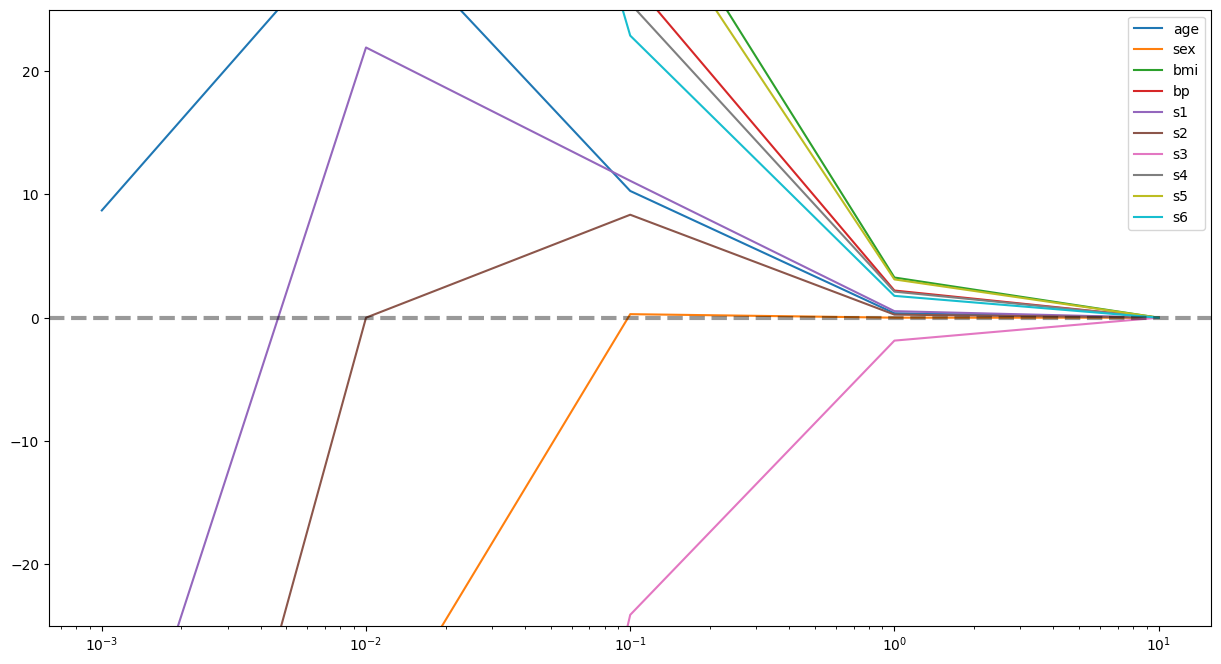

In [346]:
# 회귀계수를 그래프 시각화
plt.figure(figsize=(15, 8))
plt.semilogx(ela_df)

plt.axhline(y=0, linestyle='--', color= 'black', linewidth= 3, alpha = 0.4)
plt.legend(labels = ela_df.columns, bbox_to_anchor=(1, 1))
plt.ylim(-25, 25)

plt.show()

In [368]:
# 엘라스틱넷의 alpha에 따라서 실제 모델의 성능을 확인
ela1 = ElasticNet(alpha=0.001)
ela2 = ElasticNet(alpha=0.01)
ela3 = ElasticNet(alpha=1)

In [369]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.values,
    diabetes['target'],
    test_size=0.2,
    random_state=42
)

In [370]:
ela1.fit(X_train, Y_train)
ela2.fit(X_train, Y_train)
ela3.fit(X_train, Y_train)

,alpha,1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [371]:
pred_ela1 = ela1.predict(X_test)
pred_ela2 = ela2.predict(X_test)
pred_ela3 = ela3.predict(X_test)

In [ ]:
mes_ela1 = mean_squared_error(Y_test, pred_ela1)
mes_ela2 = mean_squared_error(Y_test, pred_ela2)
mes_ela3 = mean_squared_error(Y_test, pred_ela3)

In [373]:
print(round(mes_ela1, 4))
print(round(mes_ela2, 4))
print(round(mes_ela3, 4))

2853.3449
3318.5057
5311.2128


- 연습
    - sklearn라이브러리 안에 있는 datasets들 중에 fetch_califonia_housing 함수을 로드
    - 해당 함수를 이용하여 샘플 데이터를 변수에 저장
    - 샘플 데이터에서 독립 변수와 종속 변수를 각각 X, Y 대입하여 저장
    - train, test의 비율은 7:3비율로 데이터의 분할
    - 단순 선형 회귀, 엘라스틱넷을 이용하여 모델의 성능을 검증
        - alpha : 0.01, 0.1, 1
        - l1_ratio : 0, 5, 1
    - 평가 지표는 mse을 이용
    - 가장 성능이 좋은 모델을 확인

In [454]:
df = pd.read_csv("../california.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [455]:
X = df.drop(columns='price')
Y = df['price']

In [456]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X.values,
    Y,
    test_size=0.3,
    random_state=42
)

In [457]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [458]:
pred_list = []
mse_list = []
pred_list.append(lr.predict(X_test))
mse_list.append(mean_squared_error(Y_test, pred_list[0]))

In [459]:
alpha = [0.01, 0.1, 1]
l1_ratio = [0, 0.5, 1]

for a in alpha:
    for l1 in l1_ratio:
        ela = ElasticNet(alpha=a, l1_ratio=l1)
        ela.fit(X_train, Y_train)
        pred_list.append(ela.predict(X_test))
        mse_list.append(mean_squared_error(Y_test, pred_list[-1]))

mse_list

c:\Users\abohv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.853e+03, tolerance: 1.936e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\abohv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.208e+03, tolerance: 1.936e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of th

[0.5305677824766759,
 0.525757076585741,
 0.5251543054669674,
 0.5253119582240043,
 0.5340053198927782,
 0.5571449056777037,
 0.5970512258509187,
 0.6227709000786195,
 0.7562926012142384,
 0.9345280531749285]

In [461]:
MIN = 100
for i in range(len(mse_list)):
    if MIN > mse_list[i]:
        MIN = mse_list[i]
        idx = i
        
print(idx, MIN)

2 0.5251543054669674


## alpha=0.01, L1_ratio=0.5 일때 가장 좋은 성능을 보인다.

In [468]:
# mse_list를 dict로 만들어서 정렬
# key값을 직관적으로 표기
mse_dict = {}

for i in range(len(mse_list)):
    mse_dict[f"model_{pred_list[i/3-1]+mse_list[i/3-1]}"] = mse_list[i]

sorted_mse = sorted(mse_dict.items(), key=lambda x: x[1])
sorted_mse

TypeError: list indices must be integers or slices, not float